In [7]:
import pandas as pd   # pandas라이브러리 선언

In [8]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')   # 파일 불러오기

In [19]:
print(fish[['Weight','Length','Diagonal','Height','Width']])    # dataFrame이 아니라서 head() 못 씀

     Weight  Length  Diagonal   Height   Width
0     242.0    25.4      30.0  11.5200  4.0200
1     290.0    26.3      31.2  12.4800  4.3056
2     340.0    26.5      31.1  12.3778  4.6961
3     363.0    29.0      33.5  12.7300  4.4555
4     430.0    29.0      34.0  12.4440  5.1340
..      ...     ...       ...      ...     ...
154    12.2    12.2      13.4   2.0904  1.3936
155    13.4    12.4      13.5   2.4300  1.2690
156    12.2    13.0      13.8   2.2770  1.2558
157    19.7    14.3      15.2   2.8728  2.0672
158    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 5 columns]


In [38]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()    # numpy배열로(2차원 행렬로 변환)
fish_input

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [50]:
print(fish_input.shape)   # (샘플 수 , 특성 수) # (행의 수, 열의 수)

(159, 5)


In [51]:
fish_target = fish['Species'].to_numpy()    # [''] : 행(샘플수) , [['']] : 열(특성값)
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [52]:
print(fish_target.shape)

(159,)


### __train set, test set 나눠주기__

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

### __StandartScaler(정규화범위조정)로 모든 특성들 범위를 같도록__

In [55]:
from sklearn.preprocessing import StandardScaler    # StandardScaler : 데이터의 모든 특성들의 범위를 평균은 0, 분산은 1로같게 만들어 준다
ss = StandardScaler()

In [56]:
ss.fit(train_input) # 훈련세트의 모든 특성들을 평균은 0, 분산은 1로 만들어 주는 중 (훈련세트에 들어 있는 각 특성들의 평균, 분산을 구해서 정규화 시켜줌)

StandardScaler()

In [57]:
train_scaled = ss.transform(train_input)   # 위에서 만들어진 모델에다가 train_input값을 넣어서 정규화 시켜준다. 
train_scaled

array([[ 9.19657820e-01,  6.09431747e-01,  8.10412209e-01,
         1.85194896e+00,  1.00075672e+00],
       [ 3.00412188e-01,  1.54653445e+00,  1.45316551e+00,
        -4.69816625e-01,  2.72917446e-01],
       [-1.08585360e+00, -1.68646987e+00, -1.70848587e+00,
        -1.70159849e+00, -2.00447580e+00],
       [-7.97341433e-01, -6.08801762e-01, -6.74869070e-01,
        -8.24805885e-01, -2.76314705e-01],
       [-7.12898847e-01, -7.30625113e-01, -7.00926637e-01,
        -8.02298036e-02, -7.03386897e-01],
       [-9.12746301e-01, -9.64900787e-01, -9.52816444e-01,
        -8.80171862e-01, -9.91535662e-01],
       [-7.97341433e-01, -7.02512032e-01, -7.61727625e-01,
        -7.82824547e-01, -5.44530184e-01],
       [ 6.38182533e-01,  5.62576612e-01,  7.32239510e-01,
         1.64473401e+00,  5.07057367e-01],
       [-7.41046376e-01, -6.74398951e-01, -7.35670058e-01,
        -6.12059278e-01, -5.57331377e-01],
       [-8.67710255e-01, -7.96222301e-01, -8.92015456e-01,
        -9.33586942e-01

In [58]:
test_scaled = ss.transform(test_input)    # 훈련세트에서 구해진 각 특성들의 평균과,분산을 test세트에서도 동일하게 써야 하는 것이 point!

In [59]:
test_scaled

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996],
       [ 1.70778862,  0.79685229,  0.98412932,  2.49283113,  1.31347159],
       [-1.08726098, -1.67709884, -1.70848587, -1.76175528, -2.01154694],
       [-0.60030873, -0.3089289 , -0.29269143, -0.43855288, -0.33056738],
       [-0.57779071, -0.36515506, -0.44035097, -0.52577528, -0.17219833],
       [ 2.41147684,  2.57734741,  2.4694106 ,  0.45038962,  1.54627043],
       [ 0.72262512,  0.46886634,  0.64538096,  1.38570915,  0.7798447 ],
       [ 1.70778862,  1.0779831 ,  1.06230202,  0.86222655,  1.2659243 ],
       [ 0.58188748,  0.32830094,  0.51509312,  1.62381742,  0.6898706 ],
       [-0.68475132, -0.7962223 , -0.7

### __SGDClassifier(Stochastic Gradient Descent)(확률적 경사 하강법)모델 적용__

In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)    # loss='log':클래스들을 이진 분류로 만들어줌(정답만 양성, 나머지는 전부 음성으로)

In [62]:
sc.fit(train_scaled, train_target)

C:\Users\leeal\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [63]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


### __이어서 훈련시켜주기 : partial_fit__

In [66]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


### __epoch 그래프 그리기__(epoch값 선정)

In [67]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [68]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

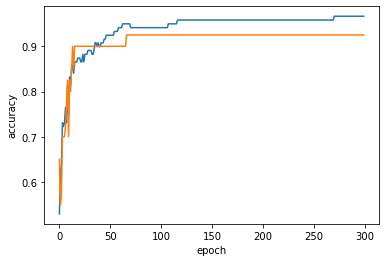

In [69]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### ---------> epoch(에포크(반복횟수)):100 선정 - > max_iter = 100
#### ( epoch 초기 : 과소적합 / epoch 100 이후 : train set, test set 점수가 조금씩 벌어지는 중 ) --> 따라서 epoch 100이 적절해 보임

##

##### SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈추는데, 
##### tol = None은 무조건 100번 반복하도록 설정해줌.

In [70]:
sc=SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [71]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


### __loss = 'hinge'를 사용해봅시당__

In [72]:
sc=SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
